# large bin identification
getting data on largest bin using homemade histogram function. motivated by a large spike appearing in histograms of read_bytes

In [1]:
def histo(jobs = [],factor = [], title = None, bins = None, scale = 'log', color = None):
    
    """
    Returns a bar graph of a specific metric from a set of jobs. Expects jobs with fmt='dict'.

    Parameters
    ----------
    
    jobs    : list, mandatory
              List of jobs in 'dict' format.
                 
    
    factor   : string, mandatory
             Mandatory. Variable plotted in histogram. must be one of the following:
             'exitcode','duration', 'rchar', 'syscr', 'syscw', 'wchar', 'cstime', 'cutime', 'majflt', 'cpu_time', 'minflt', 'rssmax', 'cmajflt',
             'cminflt', 'inblock', 'outblock', 'usertime', 'num_procs', 'processor', 'starttime', 'vol_ctxsw', 'guest_time', 'read_bytes', 'systemtime', 
             'time_oncpu', 'timeslices', 'invol_ctxsw', 'num_threads', 'write_bytes':, 'time_waiting', 'delayacct_blkio_time', 'cancelled_write_bytes'
             
    title    : string, optional
               Title at top of plot 
               
    bins  : int, optional
               Sets number of bins in histogram.
               Default is 50 bins
    
    scale    : string, optional*QH2S9T6XZgyZpd1
               Scaling factor for both x-axis and binning system. 
               By default, set to log scale. Only accepts 'log' or 'linear'.
               
    color    : string, optional
               Any color that matplotlib accepts.
               No input results in automatic color
    """
    #Plotting done with matplotlib
    import sys
    sys.path.insert(0,'/home/Ian.Laflotte/ians_py374/pip_experiment')
    import matplotlib.pyplot as plt
    import numpy as np
    
    #pull data from jobs
    data_list = []
    for job_instance in range(len(jobs)):
        if jobs[job_instance].get(factor) != None:   #prevents breakage if set is empty or doesn't exist
            data_list.append(jobs[job_instance][factor])
    #incase of a zero set
    if sum(data_list) == 0:
        return print('No non-zero data found in ',factor)
        
    #print(len(data_list))
    #make plot
    plt.figure()
    plt.style.use('default')
    
    #optional features
    #title of plot
    if title:
        plt.title(title)
    #set number of bins
    if bins:
        bins = bins
    else:
        bins = 50
    #bin check for zero, as it messes up np.log10()
    if min(data_list) == 0:
        bottom_bin = 0
    else:
        bottom_bin = np.log10(min(data_list))
    #set scaling factor
    if scale == 'log':
        plt.hist(data_list, bins = np.logspace(bottom_bin,np.log10(max(data_list)),bins), color = color)
        plt.xscale('log')
    if scale == 'linear':
        plt.hist(data_list, bins = np.linspace(min(data_list),max(data_list),bins), color = color)
        plt.xscale('linear')  

    #finish up
    plt.ylabel('Counts')
    plt.xlabel(factor)

In [ ]:
#get data to test on
import epmt_query as eq
import time
import sys
sys.path.insert(0,'/home/Avery.Kiihne/pip_experiment')
import matplotlib.pyplot as plt
import numpy as np
start = time.time()
job_num = 1000   #number of jobs grabbed
jobs_all = []
for aa in range(10):
    jobs_temp = eq.get_jobs(limit=job_num/10, before = -1, offset = job_num*aa/10, 
                           fmt='dict')
    jobs_all.extend(jobs_temp)
    print('at ',(aa+1)*10,'% completion. time elapsed:',(time.time()-start)/60)

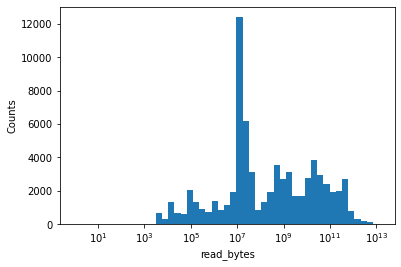

In [3]:
# basic test
histo(jobs = jobs_all, factor = 'read_bytes')

## max_id function
creating a function that outputs data about the spike and a list of job IDs in the spike

In [4]:
def max_id( jobs= [], factor =[], bins = 20, scale = 'log'):
    
    """
    Returns a bar graph of a specific metric from a set of jobs. Expects jobs with fmt='dict'.

    Parameters
    ----------
    
    jobs    : list, mandatory
              List of data in 'int' format.
              
    factor   : string, mandatory
             Mandatory. Variable plotted in histogram. must be one of the following:
             'exitcode','duration', 'rchar', 'syscr', 'syscw', 'wchar', 'cstime', 'cutime', 'majflt', 'cpu_time', 'minflt', 'rssmax', 'cmajflt',
             'cminflt', 'inblock', 'outblock', 'usertime', 'num_procs', 'processor', 'starttime', 'vol_ctxsw', 'guest_time', 'read_bytes', 'systemtime', 
             'time_oncpu', 'timeslices', 'invol_ctxsw', 'num_threads', 'write_bytes':, 'time_waiting', 'delayacct_blkio_time', 'cancelled_write_bytes'
             
    bins  : int, optional
               Sets number of bins in histogram array. Default is 20.
    
    scale    : string, optional
               Scaling factor for both x-axis and binning system. 
               By default, set to log scale. Only accepts 'log' or 'linear'.
    """
    import numpy as np
    #process data
    data = []
    refined_jobs = []
    for job_instance in range(len(jobs)):
        if jobs[job_instance].get(factor) != None:   #prevents breakage if set is empty or doesn't exist
            data.append(jobs[job_instance][factor])
            refined_jobs.append(jobs[job_instance])
    #set binning based on scale
    if scale == 'log':
        #bin check for zero, as it messes up np.log10()
        if min(data) == 0:
            bottom_bin = 0
        else:
            bottom_bin = np.log10(min(data))
        bins  = np.logspace(bottom_bin,np.log10(max(data)),bins)
    else:
        bins = np.linspace(min(data),max(data),bins)
    #make histogram data
    hist_data = np.histogram(data,bins = bins)
    counts = hist_data[0].tolist()   #convert from python array
    max_bins = [hist_data[1][counts.index(max(counts))],hist_data[1][counts.index(max(counts))+1]]
    #get ids for jobs in the largest bin
    ids = []
    for job_instance in range(len(data)):
        if float(data[job_instance]) >=max_bins[0]  and float(data[job_instance]) <= max_bins[1]:
            ids.append(refined_jobs[job_instance].get('jobid'))

    #outputs
    print('largest bin is bin ',max_bins,', with a count of ', max(counts), '\n This is ',(max(counts)/len(data))*100,'% of the total data entries')
    return ids

largest bin is bin  [15543768.52991961, 18093971.472636294] , with a count of  12022 
 This is  16.249459342560556 % of the total data entries


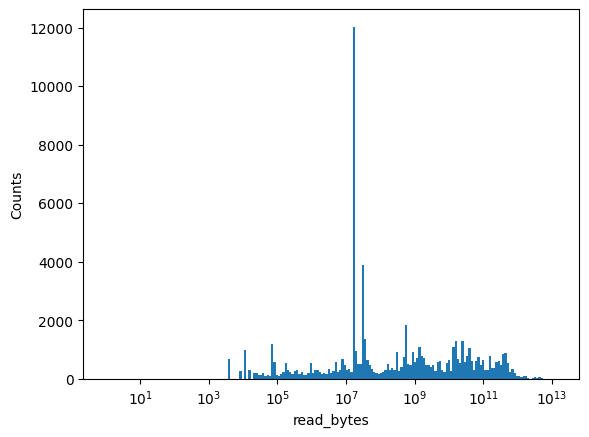

In [5]:
# basic test
histo(jobs = jobs_all, factor = 'read_bytes', bins = 200)
spike_ids = max_id(jobs = jobs_all, factor = 'read_bytes', bins = 200)
plt.savefig('analysis_plots/general_plots/spike_read_bytes.pdf', bbox_inches='tight', format = 'pdf')

# spike analysis
recreatig a variety of statistics in order to compare to non spike situations

In [6]:
#import plotting and get spike jobs
import sys
sys.path.insert(0,'/home/Ian.Laflotte/ians_py374/pip_experiment')
import matplotlib.pyplot as plt
import numpy as np

spike_jobs = eq.get_jobs(jobs=spike_ids, fmt='dict')

In [7]:
#get list of all components in spike
components = []
all_comps = []
for aa in range(len(jobs_all)):
    if jobs_all[aa]['tags']:
        all_comps.append(jobs_all[aa]['tags']['exp_component'])
for bb in range(len(spike_jobs)):
    if spike_jobs[bb]['tags']:
        components.append(spike_jobs[bb]['tags']['exp_component'])

#count up ocean jobs in spike
ocean_counter = 0
not_counter = 0
not_ocean_comp = []
for comp in components:
    if comp.find('ocean') >= 0:
        ocean_counter += 1
    else:
        not_ocean_comp.append(comp)
        not_counter += 1
#count for non spike jobs
ocean_count = 0
not_count = 0
for comp in all_comps:
    if comp.find('ocean') >= 0:
        ocean_count += 1
    else:
        not_ocean_comp.append(comp)
        not_count += 1

print('ratio of ocean jobs to not ocean jobs in histogram: ',ocean_count/not_count,' and ratio in the spike: ',ocean_counter/not_counter )

ratio of ocean jobs to not ocean jobs in histogram:  0.9638173612954606  and ratio in the spike:  2.1348109517601044


# spike comparision
We want to compare spike jobs to similar data, so we remove spike jobs from the base data set, and then compare the two sets of data.

We will normalize to make the data comparable. We will make a large comparision plot, and a flux comparision.

In [8]:
#remove spike jobs from job list
jobs_spike_gone = jobs_all.copy()   #neccesary to avoid removing from both lists
for job in jobs_all:
    if job['jobid'] in spike_ids:
        jobs_spike_gone.remove(job)

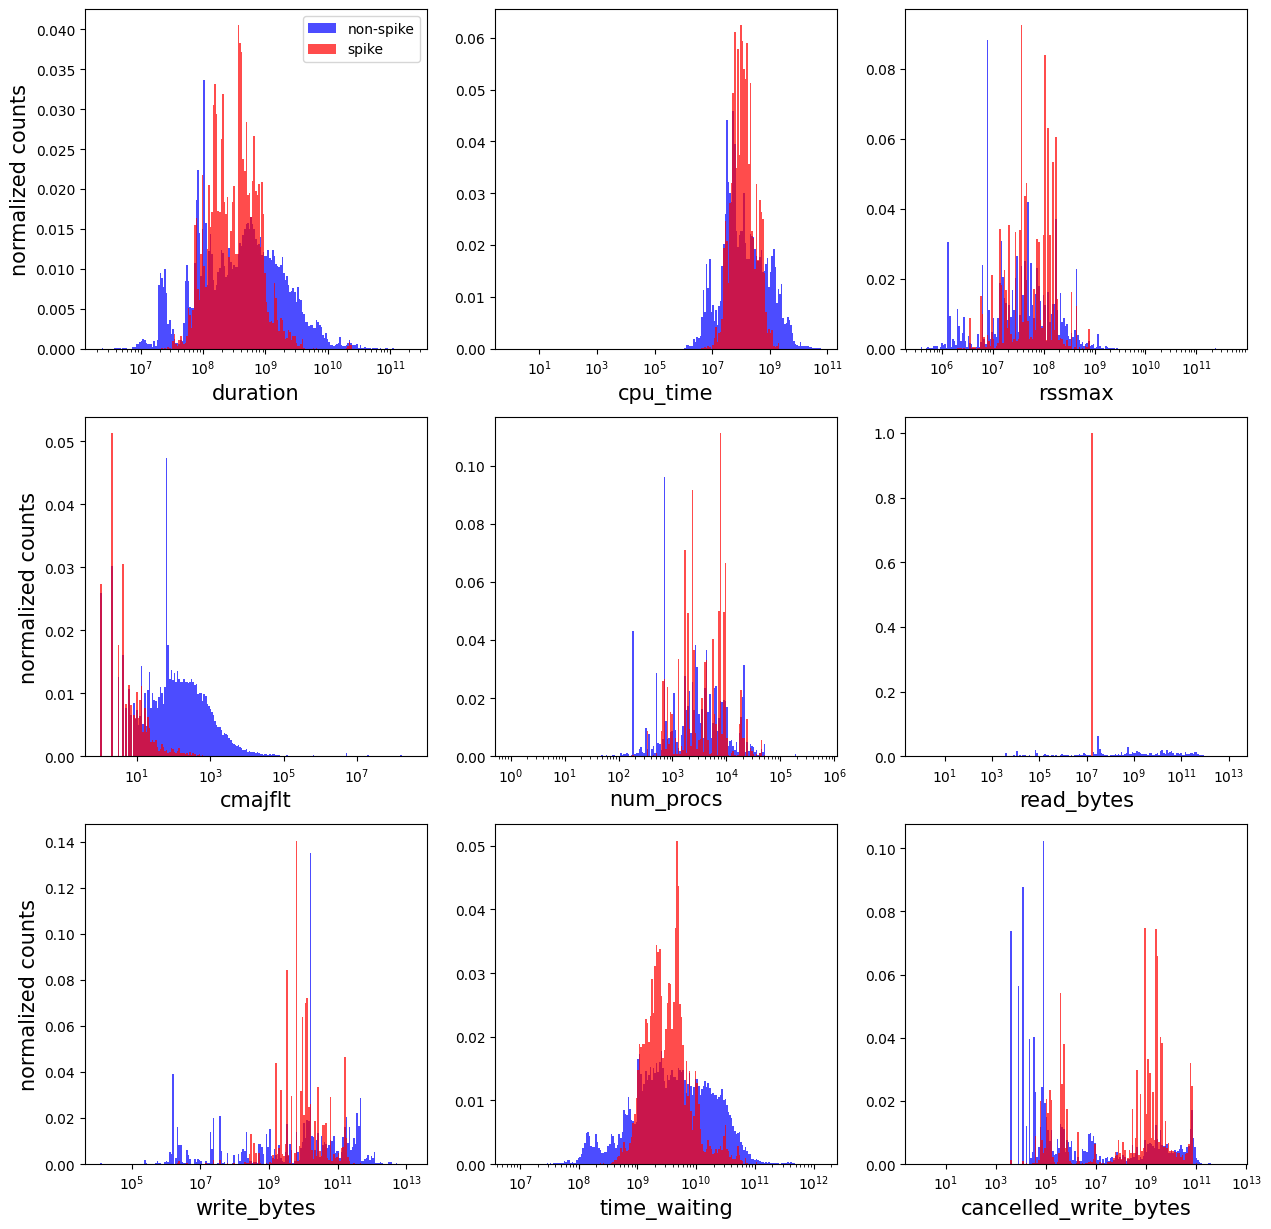

In [9]:
#subplot of every factor, with the spike data separated
#factor_list = [ 'duration', 'rchar', 'syscr', 'syscw', 'wchar', 'cstime', 'cutime', 'majflt', 'cpu_time', 'minflt', 'rssmax', 'cmajflt','cminflt', 'inblock', 'outblock', 'usertime', 'num_procs', 'starttime', 'vol_ctxsw', 'read_bytes', 'systemtime', 'time_oncpu', 'timeslices', 'invol_ctxsw', 'write_bytes', 'time_waiting', 'cancelled_write_bytes']
factor_list = [ 'duration', 'cpu_time', 'rssmax', 'cmajflt', 'num_procs',  'read_bytes',  'write_bytes', 'time_waiting',  'cancelled_write_bytes']
color = 'blue'
binning = {}
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(15,15))
ax =ax.ravel() 
for jobs in [jobs_spike_gone,spike_jobs]:
    if jobs == spike_jobs:
        color = 'red'
    for ff in range(len(factor_list)):
        factor = factor_list[ff]
        data_list = []
        for job_instance in range(len(jobs)):
            if jobs[job_instance].get(factor) != None:   #prevents breakage if set is empty or doesn't exist
                data_list.append(jobs[job_instance][factor])
        
        #make plot
        plt.style.use('default')

        bins = 200
        #bin check for zero, as it messes up np.log10()
        if min(data_list) == 0:
            bottom_bin = 0
        else:
            bottom_bin = np.log10(min(data_list))
        #make binning shared for spike and not spike
        if jobs == jobs_spike_gone:
            binning[factor] = np.logspace(bottom_bin,np.log10(max(data_list)),bins)
        #set scaling factor
        ax[ff].hist(data_list, bins = binning[factor], color = color,density = False, weights = np.ones(len(data_list))/len(data_list),alpha = .7)
        ax[ff].set_xlabel(factor, fontsize = 15)
        ax[ff].set_xscale('log')
ax[0].set_ylabel('normalized counts', fontsize = 15)
ax[3].set_ylabel('normalized counts', fontsize = 15)
ax[6].set_ylabel('normalized counts', fontsize = 15)
ax[0].legend(['non-spike','spike'])
plt.savefig('analysis_plots/super_hist_spike.pdf', bbox_inches='tight', format = 'pdf')

# investigate the spike
the next several cells follow our train of thought to find the cause of the spike

Text(0.5, 1.0, 'histogram of spike bin')

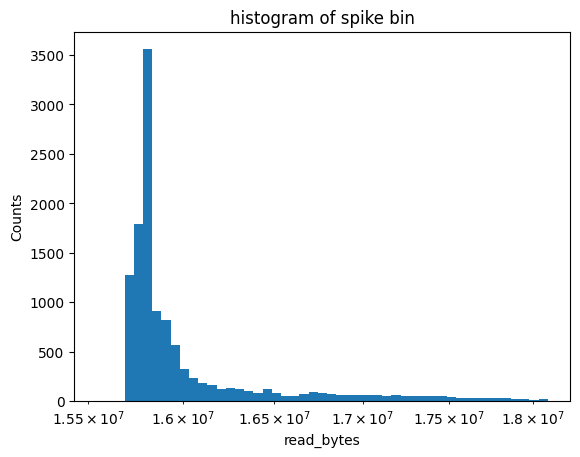

In [10]:
#histogram of just the spike
histo(spike_jobs,'read_bytes')
plt.savefig('analysis_plots/general_plots/spike_squared.pdf', bbox_inches='tight', format = 'pdf')
plt.title('histogram of spike bin')

In [11]:
#max_id the spike jobs again, notice the spike still exists, and is even narrower
spike_id_squared = max_id(jobs = spike_jobs, factor = 'read_bytes', bins = 200)
spike_jobs_squared = eq.get_jobs(jobs=spike_id_squared, fmt='dict')


largest bin is bin  [15783249.197436158, 15795291.595767861] , with a count of  1481 
 This is  12.319081683580103 % of the total data entries


In [12]:
#look at the readbytes in squared spike, all are 15GB. limited display for convience
for job in spike_jobs_squared[0:20]:
        print(job['read_bytes'])

15790080
15785984
15791104
15795200
15795200
15792128
15795200
15789056
15792640
15786496
15790080
15785984
15793152
15785984
15794176
15790592
15793152
15794176
15789056
15784960


In [13]:
#track down the users launching these similar jobs
for job in spike_jobs_squared[:]:
        print(job['user'])

Kiera.Lowman
Kiera.Lowman
Raphael.Dussin
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Bill.Hurlin
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Raphael.Dussin
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Vimal.Koul
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Meiyun.Lin
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Vimal.Koul
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Kiera.Lowman
Vimal.Koul
Vimal.Koul
Vimal.Koul
Vimal.Koul
Vimal.Koul
Vimal.Koul
Vimal.Koul
oar.gfdl.cm5
Vimal.Koul
Theresa.Morrison
Vimal.Koul
Vimal.Koul
Vimal.Koul
Vimal.Koul
oar.gfdl.cm5
Minjin.Lee
Kiera.Lowman
Vimal.Koul
Vimal.Koul
Kiera.Lowman
Vimal.Koul
oar.gfdl.cm5
Vimal.Koul
Vimal.Koul
Vimal.Koul
Vimal.Koul

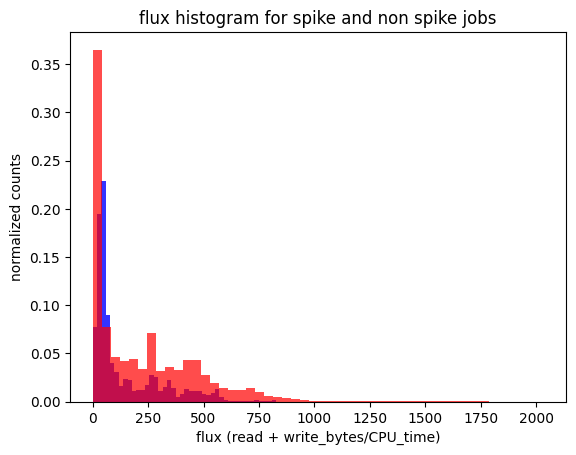

In [14]:
#plotting flux for the spike and non-spike data
data_list_spike = []
data_spike_gone = []
for job_instance in range(len(spike_jobs)):
    if spike_jobs[job_instance].get('read_bytes') != None:   #prevents breakage if set is empty or doesn't exist
        data_list_spike.append((spike_jobs[job_instance]['read_bytes']+spike_jobs[job_instance]['write_bytes'])/spike_jobs[job_instance]['cpu_time'])
for job_instance in range(len(jobs_spike_gone)):
    if jobs_spike_gone[job_instance].get('read_bytes') != None:   #prevents breakage if set is empty or doesn't exist
        data_spike_gone.append((jobs_spike_gone[job_instance]['read_bytes']+jobs_spike_gone[job_instance]['write_bytes'])/jobs_spike_gone[job_instance]['cpu_time'])
plt.hist(data_list_spike, weights = np.ones(len(data_list_spike))/len(data_list_spike), color = 'blue', bins = 50, alpha = .8)
plt.hist(data_spike_gone, weights = np.ones(len(data_spike_gone))/len(data_spike_gone), color = 'red', bins = 50, alpha = .7)
plt.title('flux histogram for spike and non spike jobs')
plt.xlabel('flux (read + write_bytes/CPU_time)')
plt.ylabel('normalized counts')
plt.savefig('analysis_plots/general_plots/spike_flux.pdf', bbox_inches='tight', format = 'pdf')

# spike procs
We will now pull up procs from the portion of the spike where all values for read_bytes are 15728640, in order to look for clues

In [26]:
#pull procs for specific jobs
spike_squared_procs = eq.get_procs(spike_id_squared, fmt = 'dct')

In [27]:
data = []
for proc in spike_squared_procs:
    data.append(proc['read_bytes'])
data = [i for i in data if i != 0]
if len(spike_id_squared) == len(data):
    print('read_bytes for each job only appear in one proc each')

In [28]:
for proc in range(len(spike_squared_procs)):
    if (spike_squared_procs[proc]['read_bytes']) == 15728640:
        example_spike_proc = spike_squared_procs[proc]
        print
example_spike_proc

{'id': 2966127611,
 'args': '-sh /ptmp/Kiera.Lowman/archive/Kiera.Lowman/FMS2019.01.03_devgfdl_20201120_kiera/ens3_therm_4xCO2_51-201_0.5TW/gfdl.ncrc5-intel23-prod/history/05360101.nc/05360101.atmos_month.nc',
 'pid': 11884,
 'depth': None,
 'jobid': '41708300',
 'ppid': 11883,
 'start': datetime.datetime(2024, 12, 22, 15, 30, 21, 573258),
 'numtids': 1,
 'pgid': 11418,
 'end': datetime.datetime(2024, 12, 22, 15, 30, 21, 636284),
 'cpu_time': 30600.0,
 'sid': 11413,
 'created_at': None,
 'duration': 63026.0,
 'inclusive_cpu_time': None,
 'gen': 0,
 'updated_at': None,
 'tags': {},
 'exename': 'ncdump',
 'exitcode': 0,
 'info_dict': None,
 'path': '/app/spack/2023.02/linux-rhel7-x86_64/gcc-12.3.0/netcdf-c/4.9.2-m76htldj7bqjt7z3v6nzclwbbcndgodp/bin/ncdump',
 'job': '41708300',
 'host': 'pp073',
 'parent': None,
 'user': None,
 'rchar': 5267374,
 'syscr': 37,
 'syscw': 6,
 'wchar': 18212,
 'cstime': 0,
 'cutime': 0,
 'majflt': 0,
 'minflt': 3603,
 'rssmax': 15620,
 'cmajflt': 0,
 'cminflt

In [46]:
specific_counter = 0
unspecific_counter = 0
for proc in range(len(spike_squared_procs)):
    if (spike_squared_procs[proc]['read_bytes']) == 15728640:
        if spike_squared_procs[proc]['args'] == '-sh /ptmp/Kiera.Lowman/archive/Kiera.Lowman/FMS2019.01.03_devgfdl_20201120_kiera/mem3_therm_1860IC_200yr_0.1TW/gfdl.ncrc5-intel23-prod/history/04560101.nc/04560101.ocean_monthly.nc':
            specific_counter = specific_counter+1
            continue
        else:
            unspecific_counter = unspecific_counter+1 

print('number of ncdump procs with specified history file: ',specific_counter,' and number that are some other history file: ',unspecific_counter)        

number of ncdump procs with specified history file:  1  and number that are some other history file:  1475


In [45]:
unspecific_counter

1475

In [18]:
#sort procs by ncdump with readbytes
ncdump_procs = []  #commands with readbytes, which are all ncdumps
ncdump_cpu_time = []
for proc in spike_squared_procs:
    if proc['read_bytes'] == 15728640:
        ncdump_procs.append(proc)
        ncdump_cpu_time.append(proc['cpu_time'])

Text(0.5, 1.0, 'cpu time for ncdump spike procs')

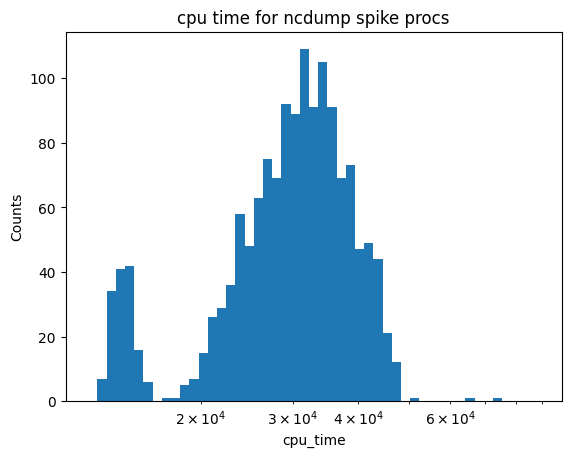

In [19]:
histo(ncdump_procs,'cpu_time')
plt.title('cpu time for ncdump spike procs')

Text(0.5, 1.0, 'time waiting for ncdump spike procs')

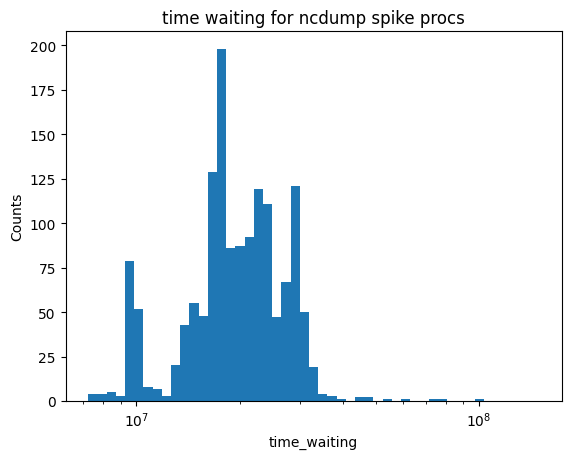

In [20]:
histo(ncdump_procs,'time_waiting')
plt.title('time waiting for ncdump spike procs')

Text(0.5, 1.0, 'duration for ncdump spike procs')

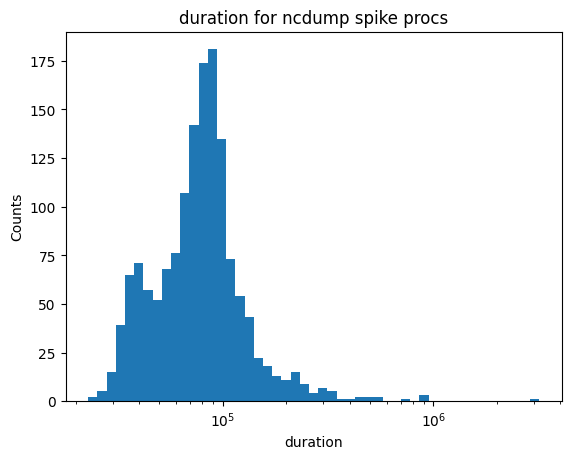

In [21]:
histo(ncdump_procs,'duration')
plt.title('duration for ncdump spike procs')

In [62]:
#investigate filing system of hardware used for spike jobs
tmp_jobs =[]
ptmp_jobs =[]
xtmp_jobs =[]
vftmp_jobs =[]
for job in spike_squared_procs[0:proc]:
    if job['args'].find('/tmp')>=0:
        tmp_jobs.append(job)
    if job['args'].find('/ptmp')>=0:
        ptmp_jobs.append(job)
    if job['args'].find('/xtmp')>=0:
        xtmp_jobs.append(job)
    if job['args'].find('/vftmp')>=0:
        vftmp_jobs.append(job)


Text(0, 0.5, 'counts')

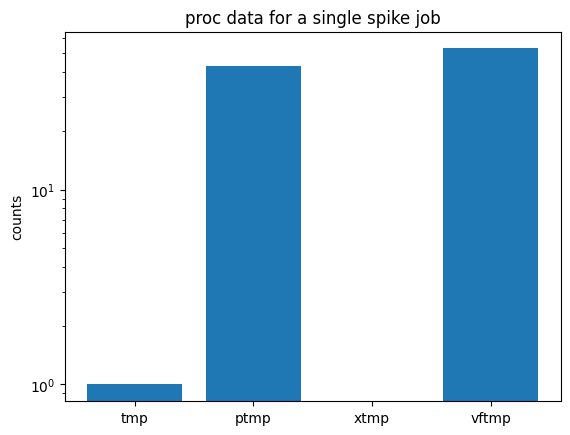

In [63]:
plt.style.use('default')
plt.bar(['tmp','ptmp','xtmp','vftmp'],[len(tmp_jobs),len(ptmp_jobs),len(xtmp_jobs),len(vftmp_jobs)])
plt.yscale('log')
plt.title('proc data for a single spike job')
plt.ylabel('counts')

## ops and target file heatmap
2D histograms with ops (gcp, hsmget, hsmput, dmget, dmput, cp, mv) and target files

In [65]:
# separate procs by their op
start = time.time()
gcp_procs =[]
hsmget_procs =[]
hsmput_procs =[]
dmget_procs =[]
cp_procs = []
mv_procs = []
for proc in spike_squared_procs:
    if proc['exename'].find('gcp')>=0 or proc['args'].find('gcp')>=0:
        gcp_procs.append(proc)
        continue
    if proc['exename'].find('hsmget')>=0 or proc['args'].find('hsmget')>=0:
        hsmget_procs.append(proc)
        continue
    if proc['exename'].find('hsmput')>=0 or proc['args'].find('hsmput')>=0:
        hsmput_procs.append(proc)
        continue
    if proc['exename'].find('dmget')>=0 or proc['args'].find('dmget')>=0:
        dmget_procs.append(proc)
        continue
    if proc['exename'].find('cp')>=0 or proc['args'].find('cp')>=0:
        cp_procs.append(proc)
        continue
    if proc['exename'].find('mv')>=0 or proc['args'].find('mv')>=0:
        mv_procs.append(proc)
        continue
print('time: ',(time.time()-start)/60)


time:  0.5010277271270752


gcp_procs  first set:  {1, 3}  and second set: {1, 3}


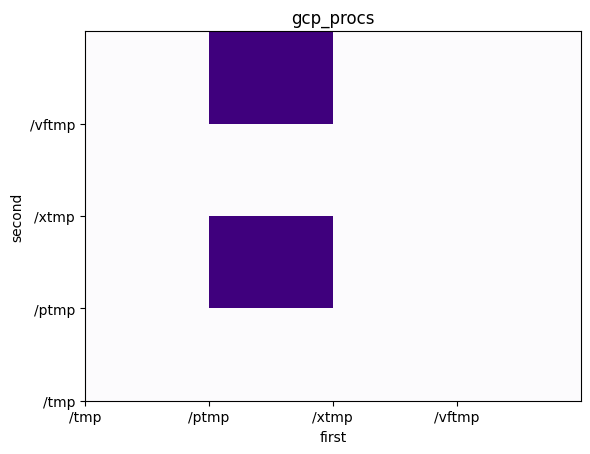

hsmget_procs  first set:  {1}  and second set: {1}


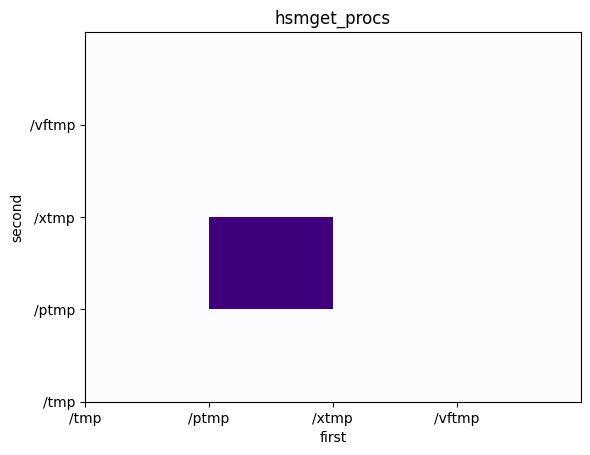

hsmput_procs  first set:  set()  and second set: set()


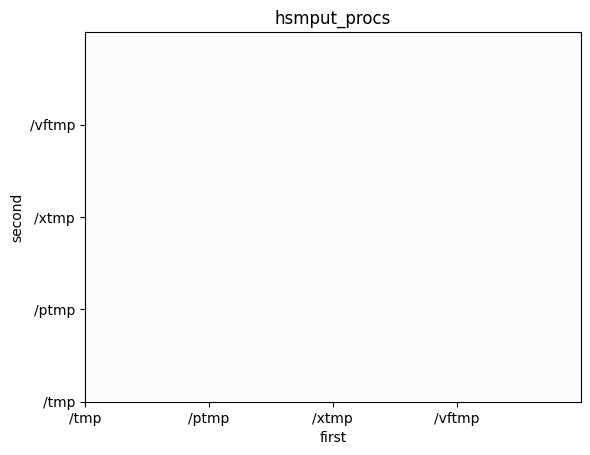

dmget_procs  first set:  set()  and second set: set()


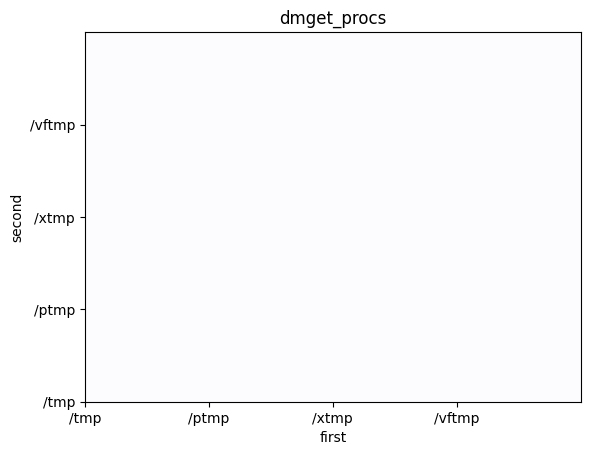

cp_procs  first set:  {1, 2, 3}  and second set: {1, 2, 3}


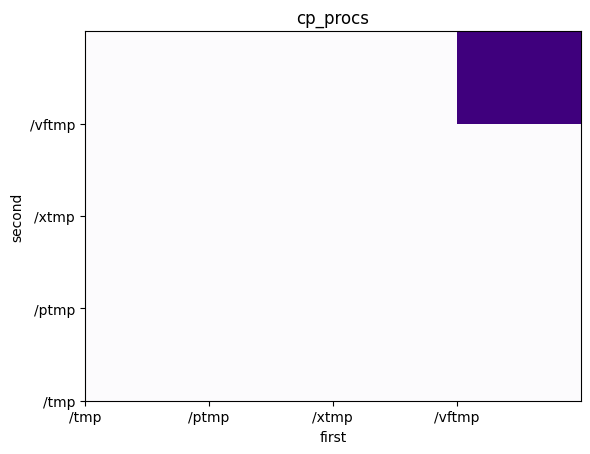

mv_procs  first set:  {2, 3}  and second set: {2, 3}


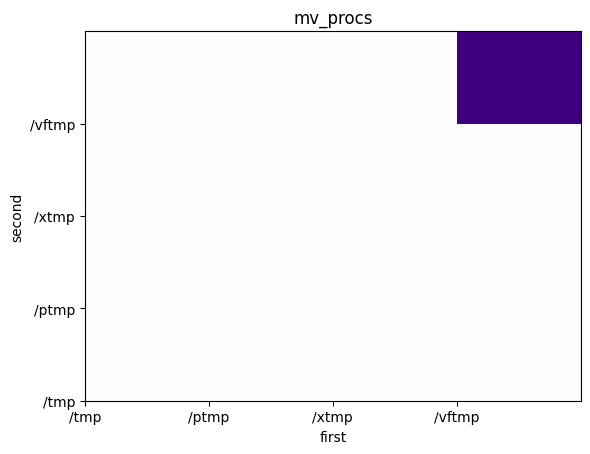

In [71]:
proc_list = [gcp_procs, hsmget_procs, hsmput_procs, dmget_procs, cp_procs, mv_procs]
proc_name = ['gcp_procs', 'hsmget_procs', 'hsmput_procs', 'dmget_procs', 'cp_procs', 'mv_procs']
file_names = ['/tmp','/ptmp','/xtmp','/vftmp']
for aa in range(6):
    first = []
    second = []
    test = 0
    for proc in proc_list[aa]:
        if len([i for i in range(len(proc['args'])) if proc['args'].startswith('tmp', i)]) < 2:
            continue
        a = 0
        b = 0
        stand_in = 0 #to get around hist2d restrictions, we represent file names with numbers
        for file in file_names:
            if 0 <= proc['args'].find(file) and a ==0:
                first.append(stand_in)
                a += 1
            if proc['args'].find(file,50)>0 and b == 0:
                second.append(stand_in)
                #print(file,stand_in)
                b += 1
            stand_in += 1
    print(proc_name[aa],' first set: ',set(first),' and second set:',set(second))
    plt.figure()
    plt.hist2d(first,second, bins =([0,1,2,3,4],[0,1,2,3,4]), cmap = 'Purples')
    # Set number of ticks for x-axis
    plt.xticks([0,1,2,3], labels = file_names)
    plt.yticks([0,1,2,3],labels = file_names)
    
    #bells and whistles
    plt.ylabel('second')
    plt.xlabel('first')
    plt.title(proc_name[aa])

    plt.show()


In [ ]:
recent_job = eq.get_jobs(limit = 1, fmt = 'orm')
